<a href="https://colab.research.google.com/github/DioGitH/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nomor 1

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Nomor 2

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Nomor 3

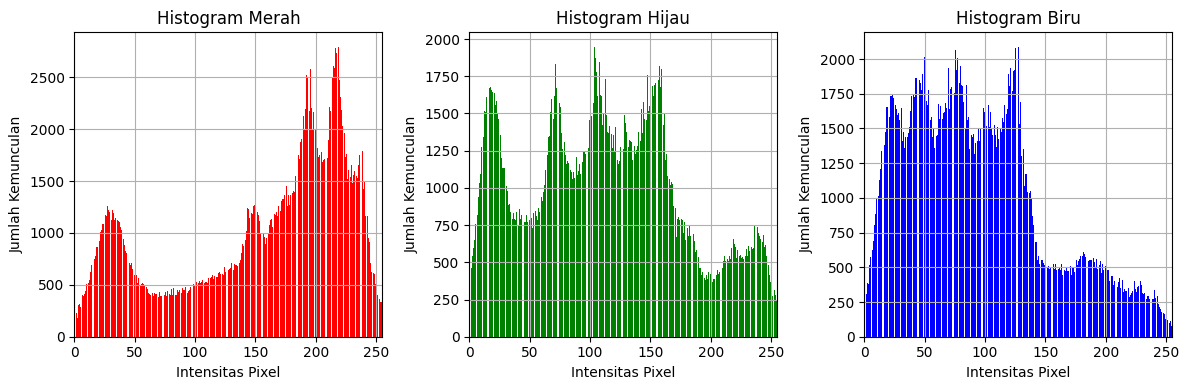

In [4]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

b, g, r = cv.split(img)

plt.figure(figsize=(12, 4))

# Plot Histogram Biru
plt.subplot(133)
plt.hist(b.ravel(), bins=256, range=(0, 256), color='blue', width=0.8)
plt.title('Histogram Biru')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 255])
plt.grid(True)

# Plot Histogram Hijau
plt.subplot(132)
plt.hist(g.ravel(), bins=256, range=(0, 256), color='green', width=0.8)
plt.title('Histogram Hijau')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 255])
plt.grid(True)

# Plot Histogram Merah
plt.subplot(131)
plt.hist(r.ravel(), bins=256, range=(0, 256), color='red', width=0.8)
plt.title('Histogram Merah')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()




Nomor 4

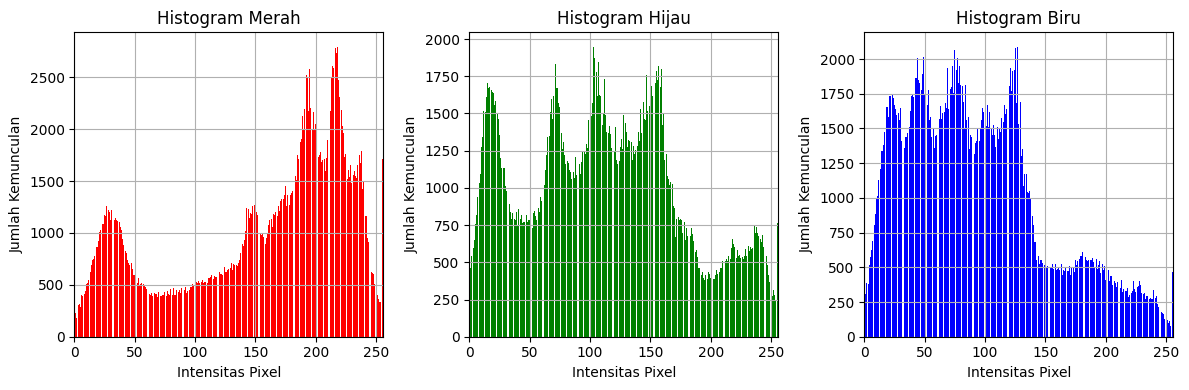

In [5]:
hist_np_b, bin_b = np.histogram(b, bins=256, range=(0, 256))
hist_np_g, bin_g= np.histogram(g, bins=256, range=(0, 256))
hist_np_r, bin_r= np.histogram(r, bins=256, range=(0, 256))

plt.figure(figsize=(12, 4))

# Plot Histogram Biru
plt.subplot(133)
plt.bar(bin_b[:-1], hist_np_b,color='blue')
plt.title('Histogram Biru')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])
plt.grid(True)

# Plot Histogram Hijau
plt.subplot(132)
plt.bar(bin_g[:-1], hist_np_g,  color='green')
plt.title('Histogram Hijau')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])
plt.grid(True)

# Plot Histogram Merah
plt.subplot(131)
plt.bar(bin_r[:-1], hist_np_r,color='red')
plt.title('Histogram Merah')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()



Nomor 5

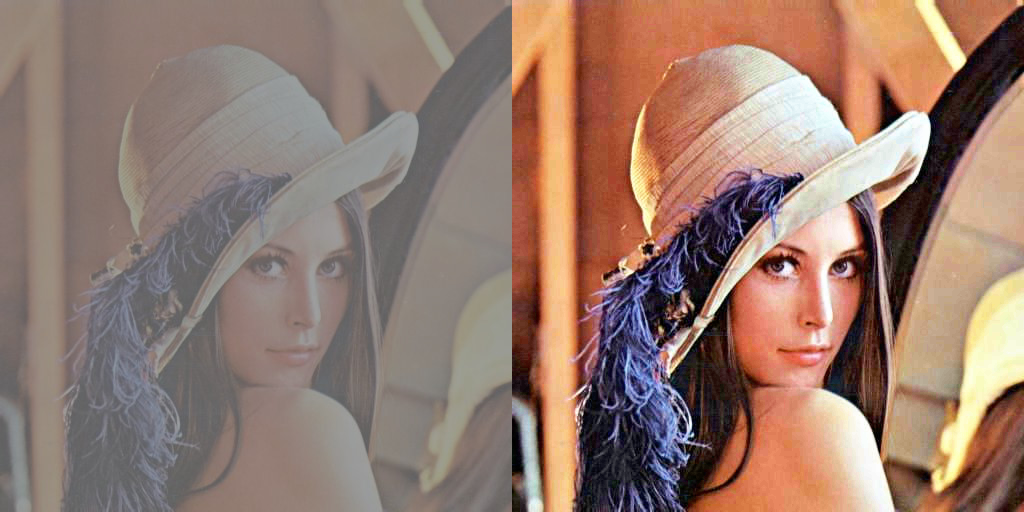

<BarContainer object of 256 artists>

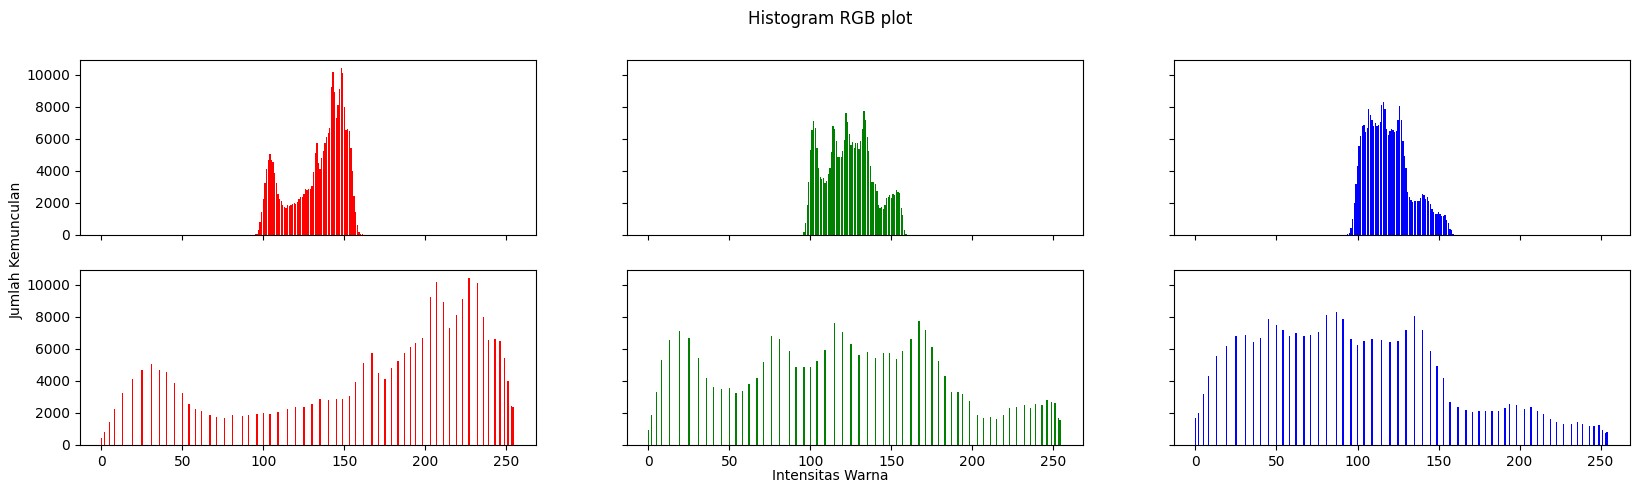

In [11]:
original = plt.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
cvt_img = cv.cvtColor(original,cv.COLOR_BGR2RGB)
names = np.arange(256)
height, width, depth = np.shape(original)

b = [0]*256
g = [0]*256
r = [0]*256

for y in range(0,height):
  for x in range(0,width):
    b[cvt_img[y][x][0]] += 1
    g[cvt_img[y][x][1]] += 1
    r[cvt_img[y][x][2]] += 1

def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(cvt_img)

img_array = np.asarray(cvt_img)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((cvt_img, img2))
cv2_imshow(final_frame)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')


Nomor 6

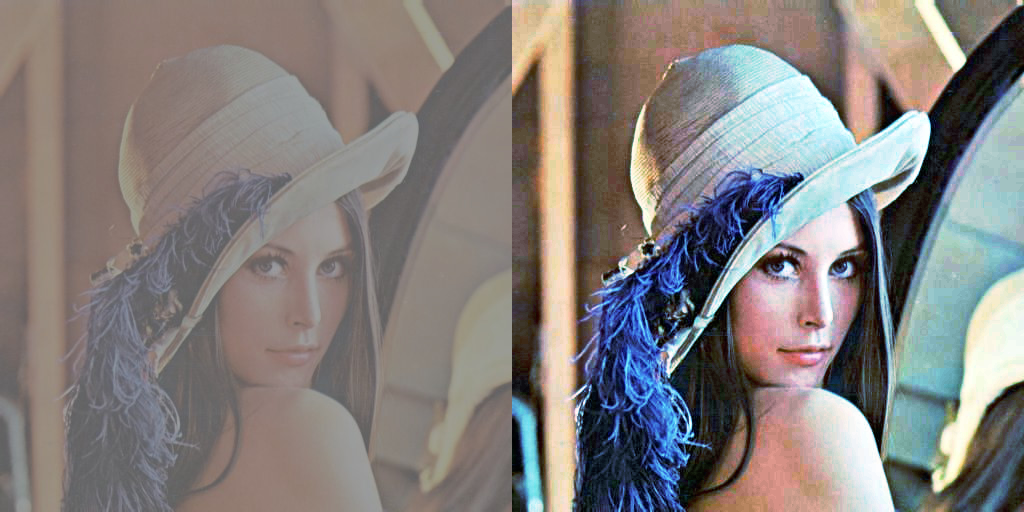

<BarContainer object of 256 artists>

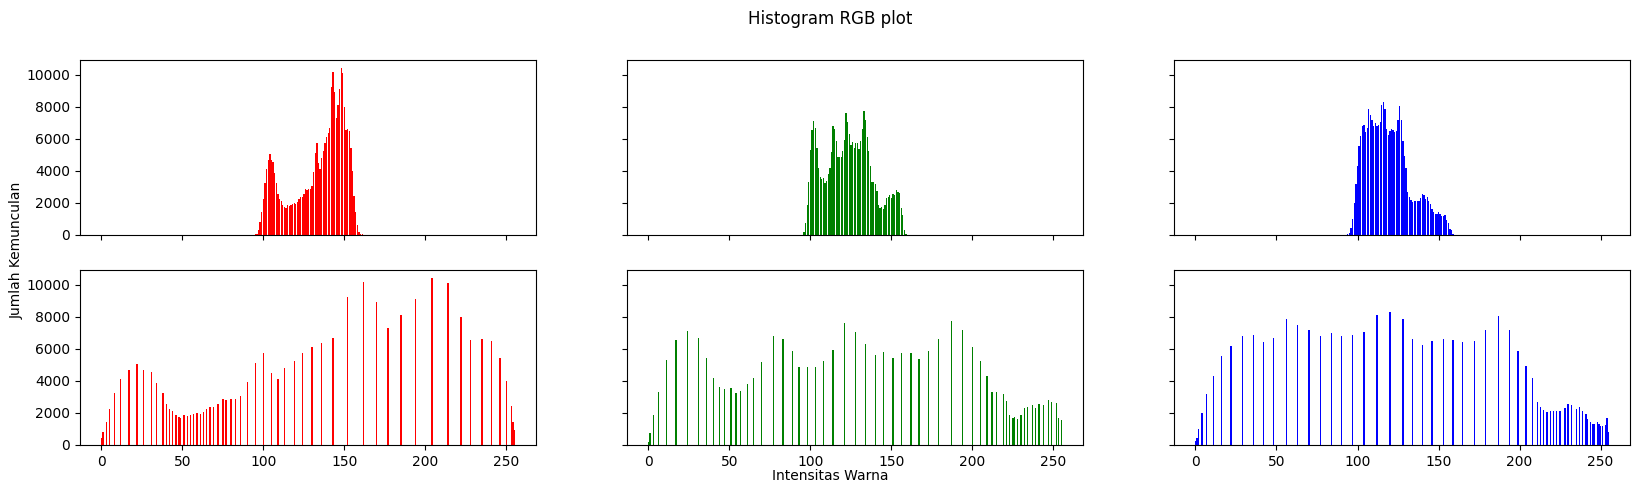

In [50]:
channels = cv.split(cvt_img)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))

eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((cvt_img, eq_image))
cv2_imshow(final_frame)

fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')


Hasil channels biru lebih dominan daripada nomor sebelumnya seperti yang terlihat pada gambar dan histogram

Nomor 7

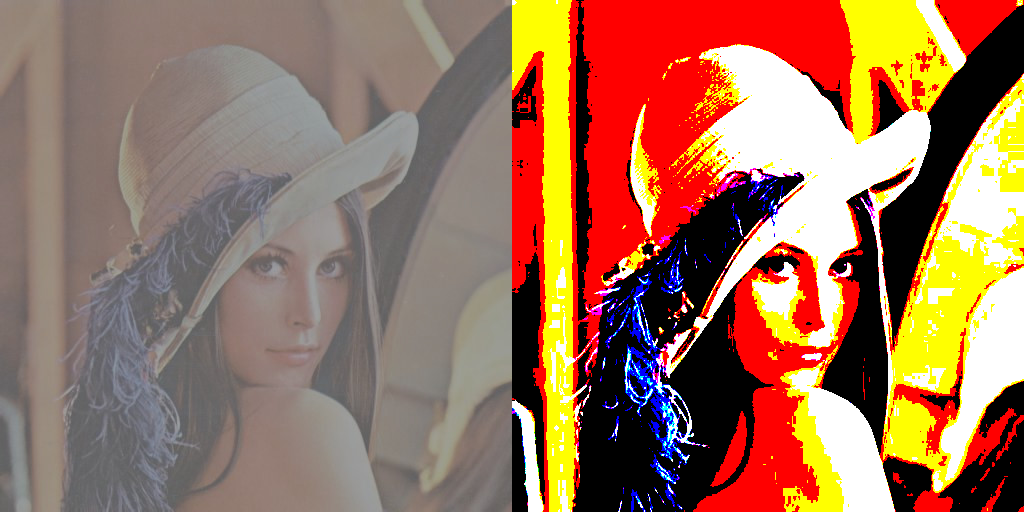

In [14]:
def arroundColor (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  colorPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

  for i in range(len(colorPallette)):
    rDiff = r - colorPallette[i][0]
    gDiff = g - colorPallette[i][1]
    bDiff = b - colorPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff

    if (distance < minDistance):
      minDistance = distance
      pValue = i

  return pValue

colorPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(cvt_img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = arroundColor(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = colorPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

Nomor 8

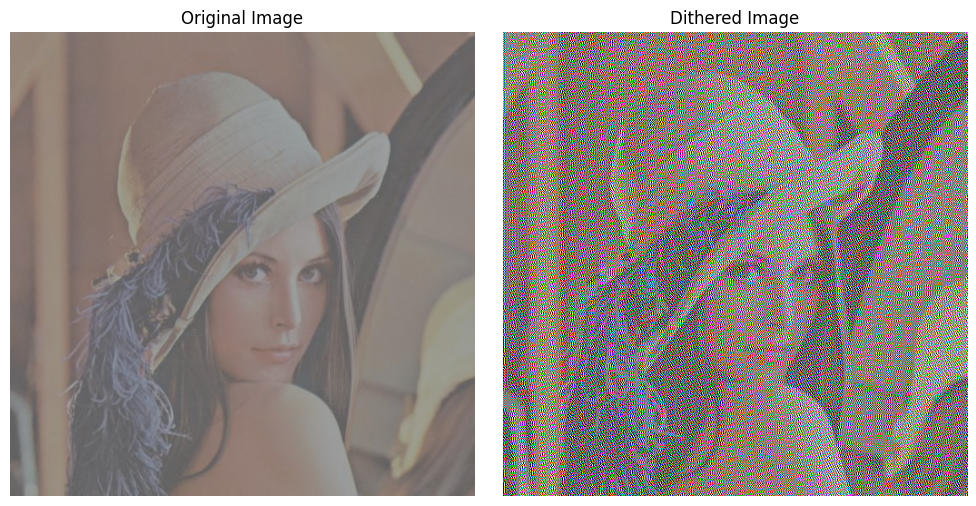

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

input_image_path = "/content/drive/MyDrive/Images/lena_lc.jpg"
input_image = Image.open(input_image_path)

output_image = apply_dithering(input_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
original2 = cv.cvtColor(cvt_img,cv.COLOR_BGR2RGB)
plt.imshow(original2)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Nomor 9

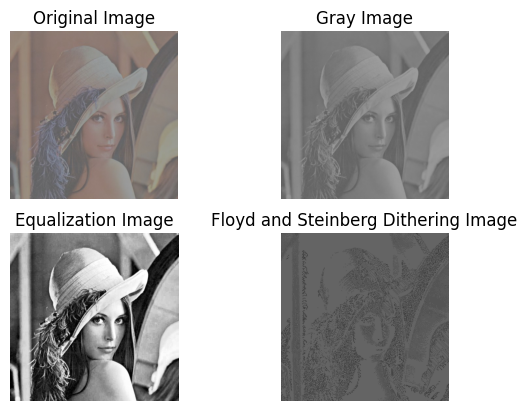

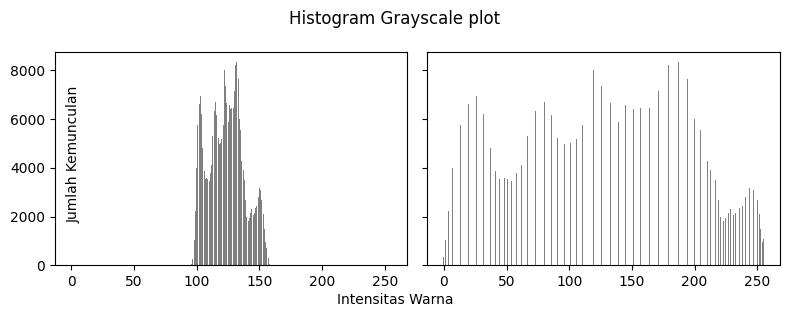

In [58]:
from cv2.gapi import equalizeHist

grayimg = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(grayimg.copy())

def floyd_steinberg_dithering(dx):
    height, width = dx.shape
    for y in range(height):
        for x in range(width):
            old_pixel = dx[y, x]
            new_pixel = 550 if old_pixel >= 230 else 100
            dx[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x < width - 1:
                dx[y, x + 1] += error * 1 / 16

            if x > 0 and y < height - 1:
                dx[y + 1, x - 1] += error * 1 / 16

            if y < height - 1:
                dx[y + 1, x] += error * 3 / 16

            if x < width - 1 and y < height - 1:
                dx[y + 1, x + 1] += error * 3 / 16

    return dx

dithered = floyd_steinberg_dithering(equ.copy())

# menampilkan gambar

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(cvt_img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(grayimg, cv.COLOR_BGR2RGB))
plt.title('Gray Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))
plt.title('Equalization Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(dithered, cv.COLOR_BGR2RGB))
plt.title('Floyd and Steinberg Dithering Image')
plt.axis('off')

# gray_hist = cv.calcHist([grayimg], [0], None, [256], [0, 256])
# histo_equalized = cv.calcHist([equ], [0], None, [256], [0, 256])

gray_histo = cv.calcHist([grayimg], [0], None, [256], [0, 256])
equ_histo = cv.calcHist([equ], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2, figsize=[8, 3], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), gray_histo[:,0], color='gray')
axs[1].bar(range(256), equ_histo[:,0], color='gray')

plt.tight_layout()
plt.show()